# Notebook V - Terrain Constraints

<hr>
This module calculates the yield reduction due to terrain slope, soil erosion, and Fournier Index (FI). Note that starting from v2.2, all terrain reduction factors are to be provided as excel sheets.

<hr>

## Set Up

First, install any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [4]:
'''import supporting libraries'''
# import pyaez
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

Set up the working directory where the PyAEZ project is located.

In [5]:
'Set the working directory'
work_dir = r'/Users/ming-mayhu/Desktop/毕业论文/qtp-pyaez/qtp_pyaez' # Please change this to your working directory
os.chdir(work_dir)
os.getcwd()


'/Users/ming-mayhu/Desktop/毕业论文/qtp-pyaez/qtp_pyaez'

Check and create data output folder.

In [6]:
'Create output folder if it does not exist'
import os
folder_path = './data_output/module5/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder created successfully.")
else:
    print("Folder already exists.")

Folder created successfully.


## Applying Terrain Constraints

In [7]:
'''importing library'''

from pyaez import TerrainConstraints
terrain_constraints = TerrainConstraints.TerrainConstraints()

from pyaez import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [8]:
'''reading climate and slope data'''
basepath = r'/Volumes/thesisDrive/Input Data/new qilian mask.tif'
precipitation = np.load(r'./data_input/climate_yearly/1979/Precip.npy') # mm / day

slope_map = gdal.Open(r'/Volumes/thesisDrive/Input Data/elevation/slope.tif').ReadAsArray() # Percentage Slope

/Users/ming-mayhu/miniforge3/envs/pyaez/lib/python3.11/site-packages/osgeo/gdal.py:606: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [16]:
rain_df = pd.read_excel(r'./data_input/terrain/barley_terrain.xlsx')
print(rain_df.columns.to_numpy())
print([type(x) for x in rain_df.columns.to_numpy()])
terrain_constraints.importTerrainReductionSheet(irr_file_path=r'./data_input/terrain/barley_terrain.xlsx',
                                rain_file_path=r'./data_input/terrain/barley_terrain.xlsx')


['Classes' '(0,0.5)' '(0.5,2)' '(2,5)' '(5,8)' '(8,16)' '(16,30)'
 '(30,45)' '(45,100)']
[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


In [17]:
'''passing climate and slope data'''

terrain_constraints.setClimateTerrainData(precipitation, slope_map)

In [20]:
'''calculation of Fournier index'''
terrain_constraints.calculateFI()

# extraction of Fournier index (FI) if required
fi = terrain_constraints.getFI()

Text(0.5, 1.0, 'Fournier Index')

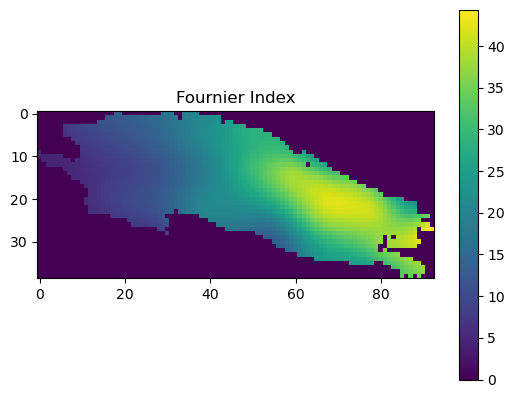

In [21]:
# Visualizing the outputs
plt.imshow(fi)
plt.colorbar()
plt.title('Fournier Index')

In [ ]:
# saving FI data
obj_utilities.saveRaster(basepath, r'./data_output/NB5/fournier_index.tif',fi)

In [23]:
'''reading yield data'''
yield_map_rain = gdal.Open('./data_output/module4/barley_soil_yield.tif').ReadAsArray()

In [24]:
'''applying terrain constraints (Rainfed)'''

yield_map_rain_m5 = terrain_constraints.applyTerrainConstraints(yield_map_rain, 'R') # I: Irrigated, R: Rain-fed

## get classified output
# yield_map_rain_class_m5 = obj_utilities.classifyFinalYield(yield_map_rain_m5)

# getting the terrain reduction factor (fc5)
fc5_rain = terrain_constraints.getTerrainReductionFactor()

Text(0.5, 1.0, 'Terrain Reduction Factor')

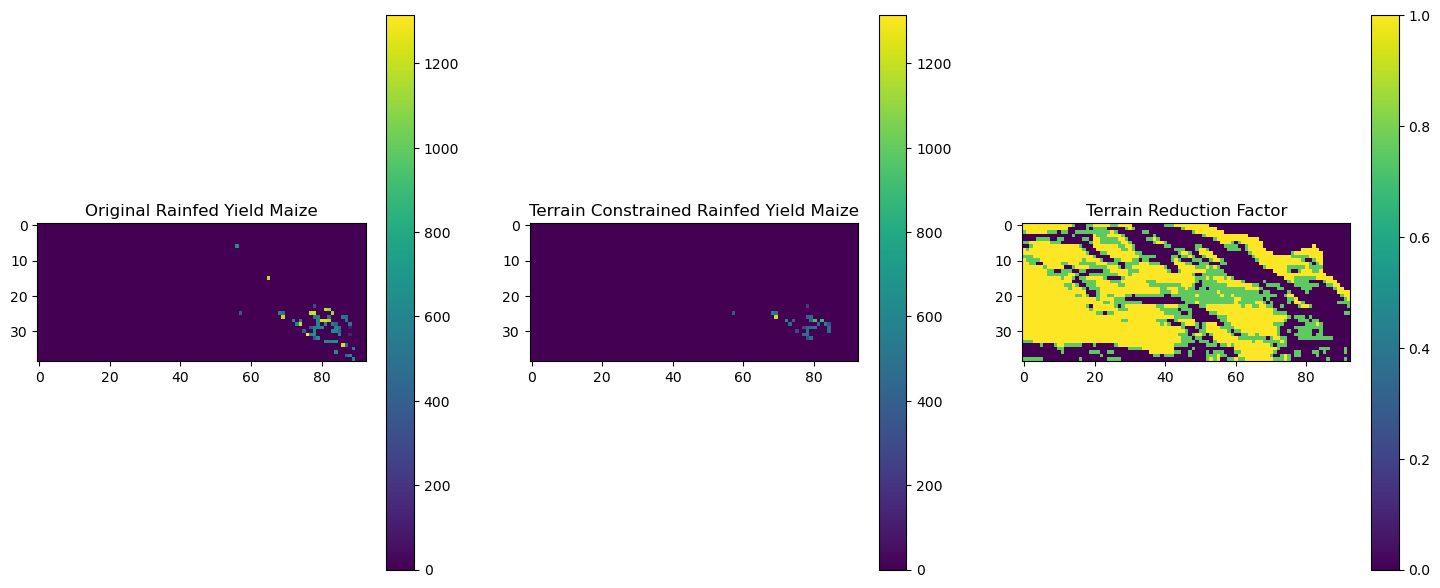

In [26]:
plt.figure(1, figsize=(18,9))
plt.subplot(1,3,1)
plt.imshow(yield_map_rain, vmax=np.max([yield_map_rain_m5, yield_map_rain]))
plt.colorbar(shrink=0.8)
plt.title('Original Rainfed Yield Maize')

plt.subplot(1,3,2)
plt.imshow(yield_map_rain_m5, vmax=np.max([yield_map_rain_m5, yield_map_rain]))
plt.colorbar(shrink=0.8)
plt.title('Terrain Constrained Rainfed Yield Maize')

plt.subplot(1,3,3)
plt.imshow(fc5_rain, vmax=1, vmin=0)
plt.colorbar(shrink=0.8)
plt.title('Terrain Reduction Factor')

In [ ]:
# saving rainfed outputs
obj_utilities.saveRaster(basepath, r'./data_output/NB5/terr_soil_clim_yld_maiz_rain.tif', yield_map_rain_m5)
obj_utilities.saveRaster(basepath, r'./data_output/NB5/fc5_maiz_rain.tif', fc5_rain)